## A3C and ACER

This notebook contains test runs of two RL Algorithms.

Asynchronous Advantage Actor Critic

Asynchronous means multiple agents are trained at the same time and submit asynchronous weight updates to a shared model.
The Gradients are derived from the Advantage Funktion (Q-V).
There is a policy and a critic network, the critic network rates the Value of the actions of the policy.

Actor Critic with Experience Replay uses the innovations of A3C.
Experience Replay increses the sample Efficiency.


In [1]:
from baselines.common import plot_util as pu
import time
from baselines.run import run, play
import tensorflow as tf

/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/simon/miniconda3/envs/science/lib/pyt

In [2]:
log_path="./logs/cartpole/"
for seed in range(0,6):
    run(seed=seed, log_path=f"{log_path}cartpole-{str(seed)}/")

Logging to ./logs/cartpole/cartpole-0/


W0309 15:33:41.419705 139788075710272 deprecation_wrapper.py:119] From /home/simon/src/github/DalasNoin/a3cacerdemo/baselines/run.py:109: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0309 15:33:41.420295 139788075710272 deprecation_wrapper.py:119] From /home/simon/src/github/DalasNoin/a3cacerdemo/baselines/common/tf_util.py:53: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0309 15:33:41.420828 139788075710272 deprecation_wrapper.py:119] From /home/simon/src/github/DalasNoin/a3cacerdemo/baselines/common/tf_util.py:67: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0309 15:33:41.421798 139788075710272 deprecation_wrapper.py:119] From /home/simon/src/github/DalasNoin/a3cacerdemo/baselines/common/tf_util.py:69: The name tf.InteractiveSession is deprecated. Please use tf.compat.v1.InteractiveSession instead.

W0309 15:33:41.457062 1397880757

env_type: classic_control
Training acer on classic_control:CartPole-v0 with arguments 
{'trust_region': True, 'nsteps': 128, 'network': 'mlp'}
Running Acer Simple
{'network': 'mlp', 'env': <baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f2278993f28>, 'seed': 0, 'nsteps': 128, 'total_timesteps': 30000, 'q_coef': 0.5, 'ent_coef': 0.01, 'max_grad_norm': 10, 'lr': 0.0007, 'lrschedule': 'linear', 'rprop_epsilon': 1e-05, 'rprop_alpha': 0.99, 'gamma': 0.99, 'log_interval': 100, 'buffer_size': 50000, 'replay_ratio': 4, 'replay_start': 10000, 'c': 10.0, 'trust_region': True, 'alpha': 0.99, 'delta': 1, 'load_path': None, 'network_kwargs': {}}


W0309 15:33:41.839164 139788075710272 deprecation.py:323] From /home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/training/moving_averages.py:433: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Params 8
<tf.Variable 'acer_model/pi/mlp_fc0/w:0' shape=(4, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc0/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/w:0' shape=(64, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/w:0' shape=(64, 2) dtype=float32_ref>
<tf.Variable 'acer_model/pi/b:0' shape=(2,) dtype=float32_ref>
<tf.Variable 'acer_model/q/w:0' shape=(64, 2) dtype=float32_ref>
<tf.Variable 'acer_model/q/b:0' shape=(2,) dtype=float32_ref>
acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0


W0309 15:33:44.289820 139788075710272 deprecation.py:323] From /home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/ops/clip_ops.py:286: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0309 15:33:44.299291 139788075710272 deprecation_wrapper.py:119] From /home/simon/src/github/DalasNoin/a3cacerdemo/baselines/acer/acer.py:183: The name tf.train.RMSPropOptimizer is deprecated. Please use tf.compat.v1.train.RMSPropOptimizer instead.

W0309 15:33:44.300050 139788075710272 deprecation.py:506] From /home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/training/rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the

[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, 'acer_model/pi/mlp_fc0/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc0/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, 'acer_model/pi/mlp_fc1/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc1/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_3/MatMul_grad/MatMul_1:0' shape=(64, 2)

/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, 'acer_model/pi/mlp_fc0/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc0/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/MatMul_grad/Ma

/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, 'acer_model/pi/mlp_fc0/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc0/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/MatMul_grad/Ma

/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, 'acer_model/pi/mlp_fc0/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc0/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/MatMul_grad/Ma

/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, 'acer_model/pi/mlp_fc0/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc0/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/MatMul_grad/Ma

/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, 'acer_model/pi/mlp_fc0/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc0/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/MatMul_grad/Ma

/home/simon/src/github/DalasNoin/a3cacerdemo/baselines/bench/monitor.py:162: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


(<Figure size 432x432 with 1 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21ca066978>]],
       dtype=object))

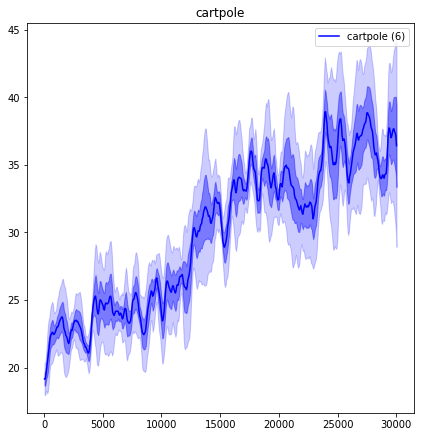

In [3]:
results = pu.load_results(log_path)
pu.plot_results(results, average_group=True)

In [17]:
log_path="./logs/cartpole-notrust/"
for seed in range(0,3):
    run(seed=seed,trust_region=False, log_path=f"{log_path}cartpole-notrust-{str(seed)}/")

Logging to ./logs/cartpole-notrust/cartpole-notrust-0/
env_type: classic_control
Training acer on classic_control:CartPole-v0 with arguments 
{'trust_region': False, 'nsteps': 128, 'network': 'mlp'}
Running Acer Simple
{'network': 'mlp', 'env': <baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f6ee1050ba8>, 'seed': 0, 'nsteps': 128, 'total_timesteps': 30000, 'q_coef': 0.5, 'ent_coef': 0.01, 'max_grad_norm': 10, 'lr': 0.0007, 'lrschedule': 'linear', 'rprop_epsilon': 1e-05, 'rprop_alpha': 0.99, 'gamma': 0.99, 'log_interval': 100, 'buffer_size': 50000, 'replay_ratio': 4, 'replay_start': 10000, 'c': 10.0, 'trust_region': False, 'alpha': 0.99, 'delta': 1, 'load_path': None, 'network_kwargs': {}}


/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Params 8
<tf.Variable 'acer_model/pi/mlp_fc0/w:0' shape=(4, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc0/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/w:0' shape=(64, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/w:0' shape=(64, 2) dtype=float32_ref>
<tf.Variable 'acer_model/pi/b:0' shape=(2,) dtype=float32_ref>
<tf.Variable 'acer_model/q/w:0' shape=(64, 2) dtype=float32_ref>
<tf.Variable 'acer_model/q/b:0' shape=(2,) dtype=float32_ref>
acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0
----------------------------------
| entropy             | 0.693    

/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Params 8
<tf.Variable 'acer_model/pi/mlp_fc0/w:0' shape=(4, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc0/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/w:0' shape=(64, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/w:0' shape=(64, 2) dtype=float32_ref>
<tf.Variable 'acer_model/pi/b:0' shape=(2,) dtype=float32_ref>
<tf.Variable 'acer_model/q/w:0' shape=(64, 2) dtype=float32_ref>
<tf.Variable 'acer_model/q/b:0' shape=(2,) dtype=float32_ref>
acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0
----------------------------------
| entropy             | 0.693    

/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Params 8
<tf.Variable 'acer_model/pi/mlp_fc0/w:0' shape=(4, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc0/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/w:0' shape=(64, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/w:0' shape=(64, 2) dtype=float32_ref>
<tf.Variable 'acer_model/pi/b:0' shape=(2,) dtype=float32_ref>
<tf.Variable 'acer_model/q/w:0' shape=(64, 2) dtype=float32_ref>
<tf.Variable 'acer_model/q/b:0' shape=(2,) dtype=float32_ref>
acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0
----------------------------------
| entropy             | 0.693    

/home/simon/src/github/DalasNoin/a3cacerdemo/baselines/bench/monitor.py:162: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


(<Figure size 432x432 with 1 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ed8acdcf8>]],
       dtype=object))

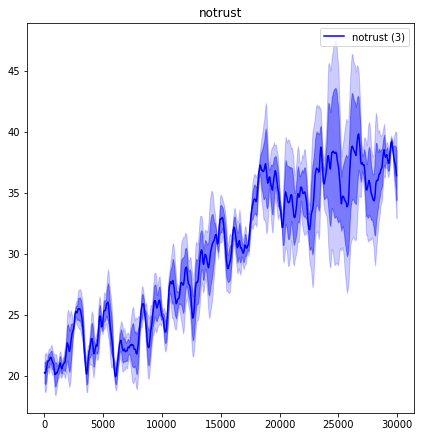

In [18]:
results = pu.load_results(log_path)

pu.plot_results(results, average_group=True)

In [4]:
play(load_path="./models/model")

Logging to ./logs/cartpoole-acer-tmp/
env_type: classic_control
Training acer on classic_control:CartPole-v0 with arguments 
{'trust_region': True, 'nsteps': 128, 'network': 'mlp'}
Running Acer Simple
{'network': 'mlp', 'env': <baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f221b7d76d8>, 'seed': 0, 'nsteps': 128, 'total_timesteps': 0, 'q_coef': 0.5, 'ent_coef': 0.01, 'max_grad_norm': 10, 'lr': 0.0007, 'lrschedule': 'linear', 'rprop_epsilon': 1e-05, 'rprop_alpha': 0.99, 'gamma': 0.99, 'log_interval': 100, 'buffer_size': 50000, 'replay_ratio': 4, 'replay_start': 10000, 'c': 10.0, 'trust_region': True, 'alpha': 0.99, 'delta': 1, 'load_path': None, 'network_kwargs': {}}
Params 8
<tf.Variable 'acer_model/pi/mlp_fc0/w:0' shape=(4, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc0/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/w:0' shape=(64, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/b:0' shape=(64,) dtype=float32_ref>
<tf.Va

/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, 'acer_model/pi/mlp_fc0/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc0/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/MatMul_grad/Ma

KeyboardInterrupt: 

'/home/simon/src/github/DalasNoin/a3cacerdemo/baselines/__init__.py'